In [4]:
import torch
from torch import nn
import numpy as np

## complex plane

$$
\begin{split}
e^{i\pi}+1&=0\\
e^{i\pi}+1&=\left(\cos\pi + i\sin\pi\right) + 1 = -1 + 1=0
\end{split}
$$

- $x=a+ib$ 
    - $e^{x}=e^{a+ib}=e^ae^{ib}=e^a\left(\cos b+i\sin b\right)$

### unit circle

- $e^{i\theta}$ 就是一个单位圆

(-1.0999791907454364,
 1.099999009083116,
 -1.0999945499436368,
 1.0999945499436368)

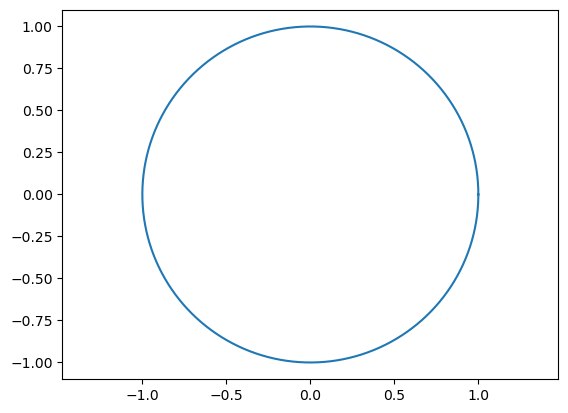

In [1]:
import numpy as np
import matplotlib.pyplot as plt

thetas = np.linspace(0, 2*np.pi, 500)

xs = np.real(np.exp(1j*thetas))
ys = np.imag(np.exp(1j*thetas))

plt.plot(xs, ys)
plt.axis('equal')

## sin position encoding

$$
\begin{split}
PE(t,2i)&=\sin\left(\frac{t}{10000^{\frac{2i}{d_{model}}}}\right)\\
PE(t,2i+1)&=\cos\left(\frac{t}{10000^{\frac{2i}{d_{model}}}}\right)\\
\Downarrow\\
PE(t,i)&=\sin\left(\frac{t}{10000^{\frac{i}{d_{model}}}}\right), \quad \text{i is even}\\
PE(t,i)&=\cos\left(\frac{t}{10000^{\frac{i-1}{d_{model}}}}\right), \quad \text{i is odd}\\
\end{split}
$$

In [2]:
max_sequence_length = 10
d_model = 6

In [5]:
even_i = torch.arange(0, d_model, 2).float()
# even_i.dtype
print(even_i)
odd_i = torch.arange(1, d_model, 2).float()
print(odd_i)

tensor([0., 2., 4.])
tensor([1., 3., 5.])


In [7]:
position = torch.arange(max_sequence_length, dtype=torch.float32)
position

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [8]:
even_pe = torch.sin(torch.outer(position, 1./torch.pow(10000, even_i/d_model)))
even_pe

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.8415,  0.0464,  0.0022],
        [ 0.9093,  0.0927,  0.0043],
        [ 0.1411,  0.1388,  0.0065],
        [-0.7568,  0.1846,  0.0086],
        [-0.9589,  0.2300,  0.0108],
        [-0.2794,  0.2749,  0.0129],
        [ 0.6570,  0.3192,  0.0151],
        [ 0.9894,  0.3629,  0.0172],
        [ 0.4121,  0.4057,  0.0194]])

In [9]:
odd_pe = torch.cos(torch.outer(position, 1./torch.pow(10000, (odd_i-1)/d_model)))
odd_pe

tensor([[ 1.0000,  1.0000,  1.0000],
        [ 0.5403,  0.9989,  1.0000],
        [-0.4161,  0.9957,  1.0000],
        [-0.9900,  0.9903,  1.0000],
        [-0.6536,  0.9828,  1.0000],
        [ 0.2837,  0.9732,  0.9999],
        [ 0.9602,  0.9615,  0.9999],
        [ 0.7539,  0.9477,  0.9999],
        [-0.1455,  0.9318,  0.9999],
        [-0.9111,  0.9140,  0.9998]])

In [10]:
stacked = torch.stack([even_pe, odd_pe], dim=2)
pe = torch.flatten(stacked, start_dim=1, end_dim=2)
pe

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])

In [11]:
class SinPositionEncoding(nn.Module):
    def __init__(self, max_sequence_length, d_model, base=10000):
        super().__init__()
        self.max_sequence_length = max_sequence_length
        self.d_model = d_model
        self.base = base
    def forward(self):
        even_i = torch.arange(0, self.d_model, 2).float()
        odd_i = torch.arange(1, self.d_model, 2).float()
        position = torch.arange(self.max_sequence_length, dtype=torch.float)
        even_pe = torch.sin(torch.outer(position, 1./torch.pow(self.base, even_i/self.d_model)))
        odd_pe = torch.cos(torch.outer(position,  1./torch.pow(self.base, (odd_i-1)/self.d_model)))
        stacked = torch.stack([even_pe, odd_pe], dim=2)
        return torch.flatten(stacked, start_dim=1, end_dim=2)

In [12]:
spe = SinPositionEncoding(max_sequence_length=10, d_model=6)
spe()

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])

## complex sin position encoding

### llama2 

- https://github.com/facebookresearch/llama/blob/main/llama/model.py

In [13]:
def precompute_freqs_cis(dim: int, end: int, theta: float = 10000.0):
    freqs = 1.0 / (theta ** (torch.arange(0, dim, 2)[: (dim // 2)].float() / dim))
    t = torch.arange(end, device=freqs.device)  # type: ignore
    freqs = torch.outer(t, freqs).float()  # type: ignore
    print(freqs.shape)
    freqs_cis = torch.polar(torch.ones_like(freqs), freqs)  # complex64
    print(freqs_cis.shape)
    return freqs_cis

- dim：d_model
- end: max_sequece_len,
- theta: base

In [14]:
precompute_freqs_cis(6, 10)

torch.Size([10, 3])
torch.Size([10, 3])


tensor([[ 1.0000+0.0000j,  1.0000+0.0000j,  1.0000+0.0000j],
        [ 0.5403+0.8415j,  0.9989+0.0464j,  1.0000+0.0022j],
        [-0.4161+0.9093j,  0.9957+0.0927j,  1.0000+0.0043j],
        [-0.9900+0.1411j,  0.9903+0.1388j,  1.0000+0.0065j],
        [-0.6536-0.7568j,  0.9828+0.1846j,  1.0000+0.0086j],
        [ 0.2837-0.9589j,  0.9732+0.2300j,  0.9999+0.0108j],
        [ 0.9602-0.2794j,  0.9615+0.2749j,  0.9999+0.0129j],
        [ 0.7539+0.6570j,  0.9477+0.3192j,  0.9999+0.0151j],
        [-0.1455+0.9894j,  0.9318+0.3629j,  0.9999+0.0172j],
        [-0.9111+0.4121j,  0.9140+0.4057j,  0.9998+0.0194j]])

In [ ]:
torch.flip(torch.view_as_real(precompute_freqs_cis(6, 10)), dims=(2, )).flatten(start_dim=1, end_dim=2)

### cis

$$
e^{ix} = \cos x + i\sin x
$$

- https://en.wikipedia.org/wiki/Cis_(mathematics)
- 相邻的两个feature（一个偶数位，一个奇数位）
    - sin 视为复数的虚部，cos 视为复数的实部

### complex representation

In [15]:
class SinPositionEncoding(nn.Module):
    def __init__(self, max_sequence_length, d_model, base=10000):
        super().__init__()
        self.max_sequence_length = max_sequence_length
        self.d_model = d_model
        self.base = base
    def forward(self):
        even_i = torch.arange(0, self.d_model, 2).float()
        position = torch.arange(self.max_sequence_length, dtype=torch.float)
        freqs = torch.outer(position, 1./torch.pow(self.base, even_i/d_model))
        freqs_cis = torch.polar(torch.ones_like(freqs), freqs)
        return torch.flip(torch.view_as_real(freqs_cis), dims=(2, )).flatten(start_dim=1, end_dim=2)

In [16]:
spe = SinPositionEncoding(max_sequence_length=10, d_model=6)
spe()

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])